The Rough Flow of collecting the data for the RedBus using selenium with Python is Demonstrated below

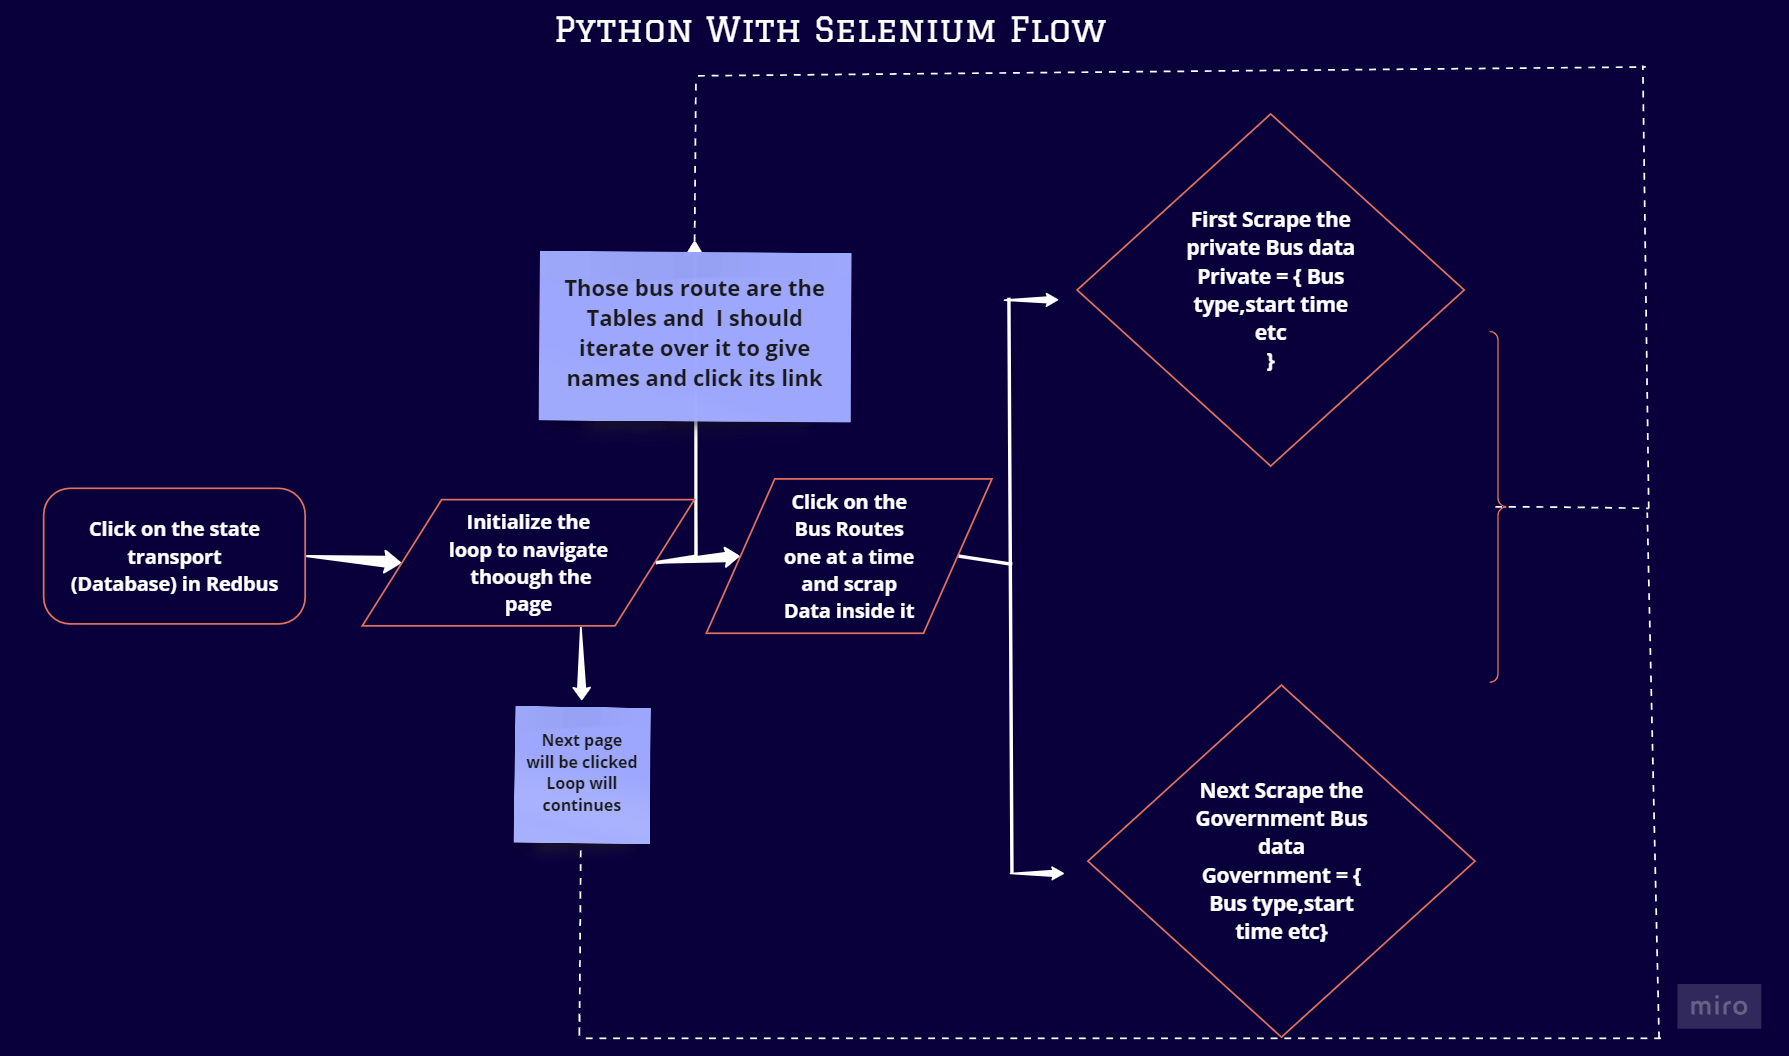

Python code for scraping the redbus data and storing it in a dictionary as a key values pair


In [ ]:
import json
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import (
    ElementNotInteractableException,
    TimeoutException,
    ElementClickInterceptedException,
    NoSuchElementException
)

class Redbus:
    def __init__(self, Xpath):
        self.Xpath = Xpath
        self.Bus = {}  

        # Initialize the Chrome driver
        self.driver = webdriver.Chrome()

        # Open the Redbus page
        self.driver.get('https://www.redbus.in/')
        time.sleep(5)

        # Scroll horizontally to bring the element into view
        target_element = WebDriverWait(self.driver, 20).until(EC.presence_of_element_located((By.XPATH, self.Xpath)))
        self.driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'center'});", target_element)
        time.sleep(2)

        # Click on the state bus link
        WebDriverWait(self.driver, 20).until(EC.element_to_be_clickable((By.XPATH, self.Xpath))).click()
        time.sleep(10)

        # Get the bus route links and names
        Bus_Route_link = [i.get_attribute('href') for i in self.driver.find_elements(By.XPATH, "//div[@class='route_details']//a")]
        Bus_Route_name = [i.text for i in self.driver.find_elements(By.XPATH, "//a[@class='route']")]

        def smooth_scroll():
            """Function to scroll to the bottom of the page to ensure all elements are loaded."""
            last_height = self.driver.execute_script("return document.body.scrollHeight")
            while True:
                # Scroll down to the bottom
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                # Wait for new content to load
                time.sleep(2)
                # Calculate new scroll height and compare with last height
                new_height = self.driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

        for i in range(1, 6):
            if i > 1:
                # Refresh bus route links and names for subsequent pages
                Bus_Route_link = [i.get_attribute('href') for i in self.driver.find_elements(By.XPATH, "//div[@class='route_details']//a")]
                Bus_Route_name = [i.text for i in self.driver.find_elements(By.XPATH, "//a[@class='route']")]

            for name, link in zip(Bus_Route_name, Bus_Route_link):
                self.driver.get(link)
                time.sleep(10)
                self.Bus[name] = {"Private": {}, "Government": {}}

                # Wait for elements to load and fetch private bus details
                time.sleep(10) 
                try:
                    # Smooth scroll before scraping private bus details
                    smooth_scroll()

                    # Scrape private bus details
                    Bus_travel_Name, Bus_Confort_Type, Bus_start_time, Bus_end_time, Total_travel_time, Rating, Seat_availability, Price, Reach_date = WebDriverWait(self.driver, 25).until(
                        lambda driver: (
                            driver.find_elements(By.XPATH, "//div[@class='travels lh-24 f-bold d-color']"),
                            driver.find_elements(By.XPATH, "//div[@class='bus-type f-12 m-top-16 l-color evBus']"),
                            driver.find_elements(By.XPATH, "//div[@class='dp-time f-19 d-color f-bold']"),
                            driver.find_elements(By.XPATH, "//div[@class='bp-time f-19 d-color disp-Inline']"),
                            driver.find_elements(By.XPATH, "//div[@class='dur l-color lh-24']"),
                            driver.find_elements(By.XPATH, "//div[@class='rating-sec lh-24']//span"),
                            driver.find_elements(By.XPATH, "//div[@class='seat-left m-top-30']"),
                            driver.find_elements(By.XPATH, "//div[@class='fare d-block']"),
                            driver.find_elements(By.XPATH, "//div[@class='next-day-dp-lbl m-top-16']")
                        )
                    )

                    # Store scraped data for private buses
                    self.Bus[name]["Private"]["Bus_Name"] = [elem.text.strip() for elem in Bus_travel_Name if elem.text != '']
                    self.Bus[name]["Private"]["Bus_Type"] = [elem.text.strip() for elem in Bus_Confort_Type if elem.text != '']
                    self.Bus[name]["Private"]["Departing_Time"] = [elem.text.strip() for elem in Bus_start_time if elem.text != '']
                    self.Bus[name]["Private"]["Reaching_Time"] = [elem.text.strip() for elem in Bus_end_time if elem.text != '']
                    self.Bus[name]["Private"]["Duration"] = [elem.text.strip() for elem in Total_travel_time if elem.text != '']
                    self.Bus[name]["Private"]["Star_Rating"] = [float(elem.text.strip()) for elem in Rating if elem.text != '']
                    self.Bus[name]["Private"]["Seat_availability"] = [int(i.text.split()[0]) for i in Seat_availability if i.text != '']
                    self.Bus[name]["Private"]["Price"] = [i.text[3:].strip() for i in Price if i.text[3:] != '']
                    self.Bus[name]["Private"]["Reach_date"] = [elem.text.strip() for elem in Reach_date if elem.text != '']

                    # Click to switch to government buses
                    try:
                        button = WebDriverWait(self.driver, 15).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='button']")))

                        # Scroll the button into view
                        self.driver.execute_script("arguments[0].scrollIntoView(true);", button)
                        time.sleep(1)  

                        
                        self.driver.execute_script("arguments[0].click();", button)

                    except ElementClickInterceptedException as e:
                        print(f"Error clicking the button to switch to government buses: {e}")

                    # Smooth scroll before scraping government bus details
                    smooth_scroll()

                    # Scrape government bus details
                    Bus_travel_Name, Bus_Confort_Type, Bus_start_time, Bus_end_time, Total_travel_time, Rating, Seat_availability, Price, Reach_date = WebDriverWait(self.driver, 25).until(
                        lambda driver: (
                            driver.find_elements(By.XPATH, "//div[@class='travels lh-24 f-bold d-color']"),
                            driver.find_elements(By.XPATH, "//div[@class='bus-type f-12 m-top-16 l-color evBus']"),
                            driver.find_elements(By.XPATH, "//div[@class='dp-time f-19 d-color f-bold']"),
                            driver.find_elements(By.XPATH, "//div[@class='bp-time f-19 d-color disp-Inline']"),
                            driver.find_elements(By.XPATH, "//div[@class='dur l-color lh-24']"),
                            driver.find_elements(By.XPATH, "//div[@class='rating-sec lh-24']//span"),
                            driver.find_elements(By.XPATH, "//div[@class='seat-left m-top-30']"),
                            driver.find_elements(By.XPATH, "//div[@class='fare d-block']"),
                            driver.find_elements(By.XPATH, "//div[@class='next-day-dp-lbl m-top-16']")
                        )
                    )

                    # Store scraped data for government buses
                    self.Bus[name]["Government"]["Bus_Name"] = [elem.text.strip() for elem in Bus_travel_Name if elem.text != '']
                    self.Bus[name]["Government"]["Bus_Type"] = [elem.text.strip() for elem in Bus_Confort_Type if elem.text != '']
                    self.Bus[name]["Government"]["Departing_Time"] = [elem.text.strip() for elem in Bus_start_time if elem.text != '']
                    self.Bus[name]["Government"]["Reaching_Time"] = [elem.text.strip() for elem in Bus_end_time if elem.text != '']
                    self.Bus[name]["Government"]["Duration"] = [elem.text.strip() for elem in Total_travel_time if elem.text != '']
                    self.Bus[name]["Government"]["Star_Rating"] = [float(elem.text.strip()) for elem in Rating if elem.text != '']
                    self.Bus[name]["Government"]["Seat_availability"] = [int(i.text.split()[0]) for i in Seat_availability if i.text != '']
                    self.Bus[name]["Government"]["Price"] = [i.text[3:].strip() for i in Price if i.text[3:] != '']
                    self.Bus[name]["Government"]["Reach_date"] = [elem.text.strip() for elem in Reach_date if elem.text != '']
                except TimeoutException as e:
                    print(f"Error fetching bus details for {name}: {e}")

            # Navigate back and handle pagination
            try:
                time.sleep(7)
                self.driver.get('https://www.redbus.in/')
                time.sleep(5)
                
                # Scroll horizontally to bring the element into view
                target_element = WebDriverWait(self.driver, 20).until(EC.presence_of_element_located((By.XPATH, self.Xpath)))
                self.driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'center'});", target_element)
                time.sleep(2)
                
                WebDriverWait(self.driver, 20).until(EC.element_to_be_clickable((By.XPATH, self.Xpath))).click()
                time.sleep(10)

                xpath = f"//div[12]/div[{i + 1}]"

                # Check if the element exists
                if not self.driver.find_elements(By.XPATH, xpath):
                    print(f"Page {i + 1} does not exist. Exiting loop.")
                    break

                # Wait for the element to be present and visible
                element = WebDriverWait(self.driver, 25).until(EC.visibility_of_element_located((By.XPATH, xpath)))

                # Scroll the element into view before clicking
                self.driver.execute_script("arguments[0].scrollIntoView(true);", element)
                time.sleep(1)  

                # Attempt to click the element
                element.click()

            except ElementNotInteractableException as e:
                print(f"Error navigating to page {i + 1}: {e}")
            except ElementClickInterceptedException as e:
                print(f"Click intercepted when trying to navigate to page {i + 1}: {e}")
            except TimeoutException or NoSuchElementException as e:
                print(f"Page is over {i + 1}: {e}")

        # Close the WebDriver
        self.driver.quit()

    def get_bus_data(self):
        """Return the scraped bus data."""
        return self.Bus

# Creating an instance of Redbus
Buses = Redbus("//div[@class='rtcNameMain']/div[@class='rtcName' and text()='JKSRTC']")

# Accessing the values inside the instance
Value = Buses.get_bus_data()


In [11]:
Value.keys()

dict_keys(['Jammu (j and k) to Srinagar', 'Delhi to Srinagar', 'Srinagar to Jammu (j and k)', 'Jammu (j and k) to Haridwar', 'Jammu (j and k) to Delhi', 'Delhi to Jammu (j and k)', 'Katra (jammu and kashmir) to Jammu (j and k)', 'Jammu (j and k) to Katra (jammu and kashmir)', 'Mendhar (J & K) to Jammu (j and k)', 'Jammu (j and k) to Poonch', 'Haridwar to Jammu (j and k)', 'Chandigarh to Jammu (j and k)', 'Jammu (j and k) to Kishtwar', 'Jammu (j and k) to Mendhar (J & K)', 'Jammu (j and k) to Amritsar', 'Ajmer to Jammu (j and k)'])

In [12]:
Dumping = json.dumps(Value)
Buses_data= json.loads(Dumping)

# DataBases of Red_bus Project
#APSRTC_Buses
#Kerala_RTC
#TSRTC_Buses
#UPSRTC_Bus
#SBSTC_Buses
#HRTC_Buses
#BSRTC_Buses
#CTU_RTC_Buses
#RSRTC_Buses
#KTCL_Buses
#ASTC_Buses
#WBTC_Buses
#PEPSU_Buses
#NBSTC_Buses
#KAAC_Buses
#JKSRTC_Buses

Flow of Importing the data into the SQL Database

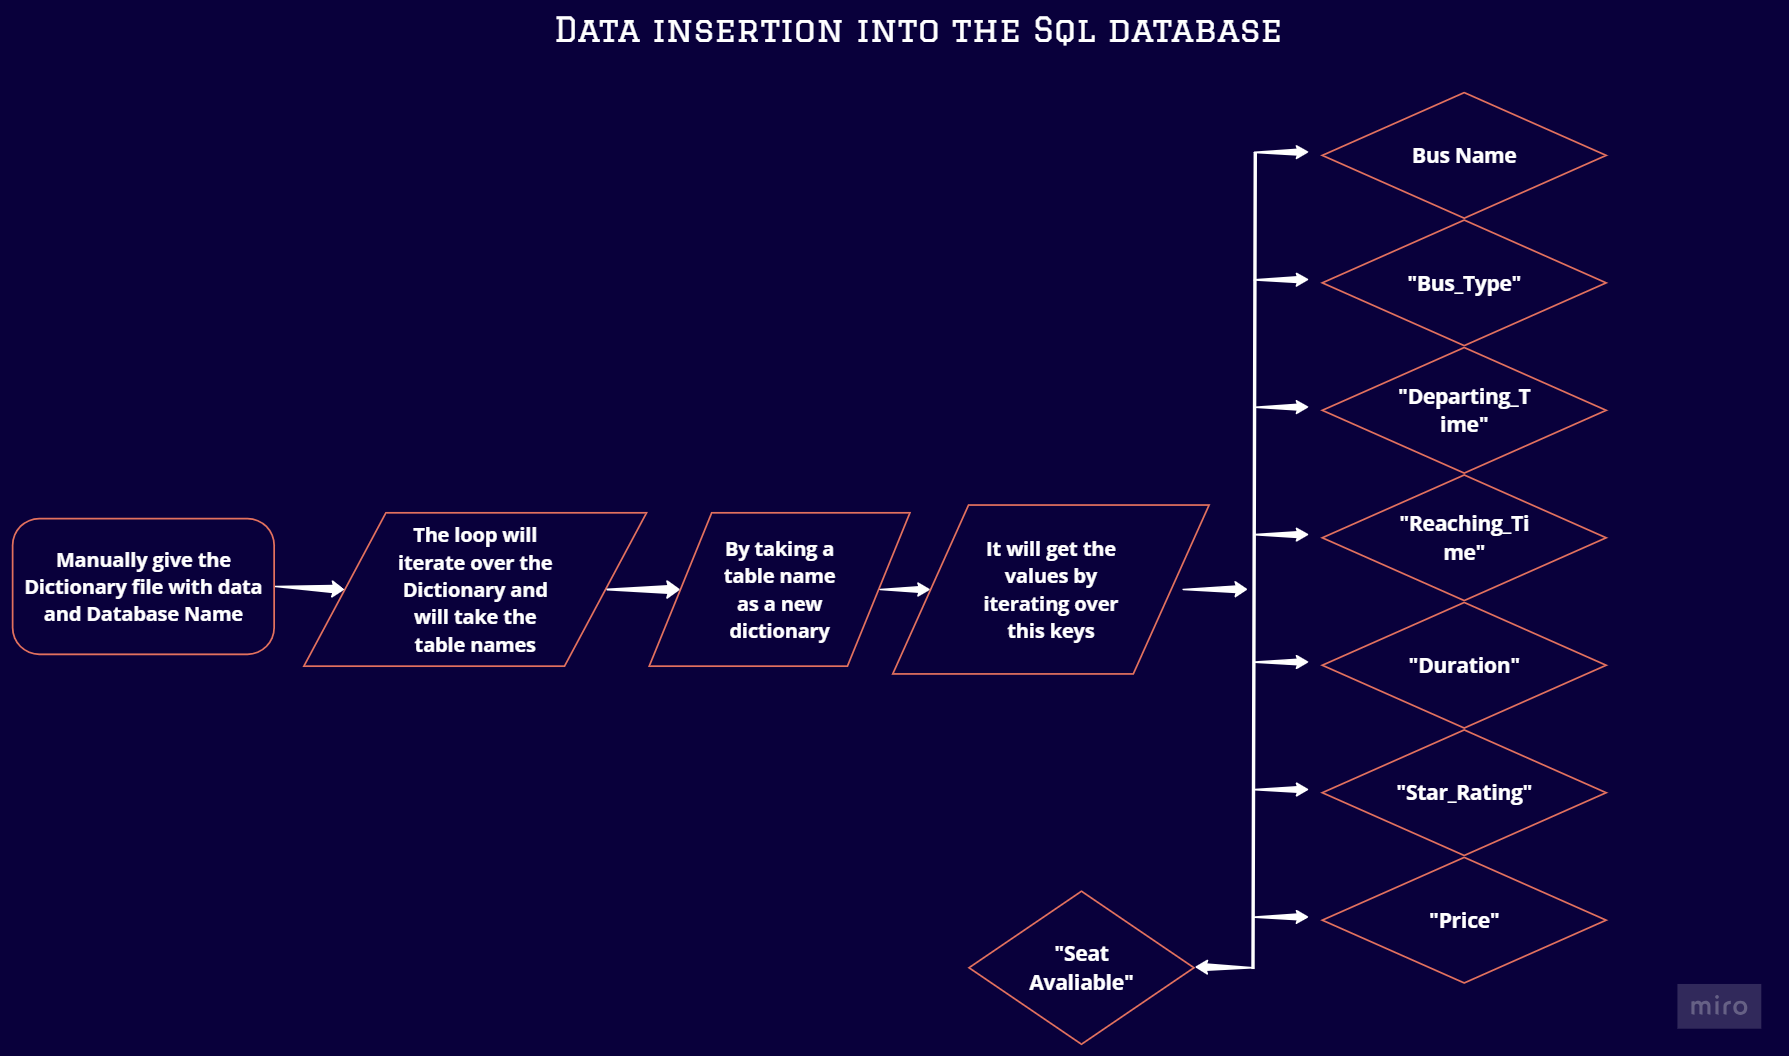

SQL working code of Importing Redbusdata to a SQL Database 

In [14]:
import mysql.connector

class Importing:
    def __init__(self, Table_insert, database_name):
        self.Table_insert = Table_insert
        self.database_name = database_name

        # Connect to MySQL
        self.mydb = mysql.connector.connect(
            host="localhost",
            user="root",
            password="",
            autocommit=True  # Enable autocommit
        )

        print(self.mydb)
        self.mycursor = self.mydb.cursor(buffered=True)

        # Create the database
        self.mycursor.execute(f"CREATE DATABASE IF NOT EXISTS {self.database_name}")
        self.mycursor.execute(f"USE {self.database_name}")  # Switch to the new database

        
        self.table_names = [i for i in self.Table_insert]
        print(self.table_names)

        # Create tables
        for table_name in self.table_names:
            # Escape table names with backticks to handle spaces and reserved keywords
            table_name_1 = f"`{table_name}`"
            
            # Create the table with the specified schema
            self.mycursor.execute(f"""
                CREATE TABLE {table_name_1} (
                    id INT NOT NULL AUTO_INCREMENT,
                    Bus_Operator_type VARCHAR(15),
                    BusName VARCHAR(50),
                    BusType VARCHAR(15),
                    Departing_Time TIME,
                    Duration VARCHAR(30),
                    Reaching_Time TIME,
                    Star_rating FLOAT(5),
                    Price FLOAT(5),
                    Seats_available INT(5),
                    PRIMARY KEY (id)
                )
            """)

        # Insert data into the tables
        for table_name in self.table_names:
            table_name_1 = f"`{table_name}`"
            print(f"Inserting data for table: {table_name}")
            for operator_type in ['Private', 'Government']:
                print(f"Inserting data for operator type: {operator_type}")
                try:
                    bus_name = self.Table_insert[table_name][operator_type]['Bus_Name']
                    bus_type = self.Table_insert[table_name][operator_type]['Bus_Type']
                    departing_time = self.Table_insert[table_name][operator_type]['Departing_Time']
                    duration = self.Table_insert[table_name][operator_type]['Duration']
                    reaching_time = self.Table_insert[table_name][operator_type]['Reaching_Time']
                    star_rating = self.Table_insert[table_name][operator_type]['Star_Rating']
                    price = self.Table_insert[table_name][operator_type]['Price']
                    seats_available = self.Table_insert[table_name][operator_type]['Seat_availability']
                except KeyError as e:
                    print(f"KeyError: {e} in table {table_name} for operator type {operator_type}. Skipping...")
                    continue

                
                insert_query = f"INSERT INTO {table_name_1} (Bus_Operator_type, BusName, BusType, Departing_Time, Duration, Reaching_Time, Star_rating, Price, Seats_available) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"

                # Get the minimum length among the lists to avoid index errors
                value_lengths = [len(i) for i in [bus_name, bus_type, departing_time, duration, reaching_time, star_rating, price, seats_available]]
                min_length = min(value_lengths)
                print(f"Minimum length of lists: {min_length}")

                # Insert each value in the list as a separate row
                for i in range(min_length):
                    print(f"Inserting row {i+1} for {table_name} - {operator_type}")
                    print((
                        operator_type, 
                        bus_name[i], 
                        bus_type[i], 
                        departing_time[i], 
                        duration[i], 
                        reaching_time[i], 
                        star_rating[i], 
                        price[i], 
                        seats_available[i]
                    ))
                    self.mycursor.execute(insert_query, (
                        operator_type, 
                        bus_name[i], 
                        bus_type[i], 
                        departing_time[i], 
                        duration[i], 
                        reaching_time[i], 
                        star_rating[i], 
                        price[i], 
                        seats_available[i]
                    ))
                    self.mydb.commit()  # Commit after each insertion

importer = Importing(JKSRTC_Buses, "JKSRTC_Buses")


['Jammu (j and k) to Srinagar', 'Delhi to Srinagar', 'Srinagar to Jammu (j and k)', 'Jammu (j and k) to Haridwar', 'Jammu (j and k) to Delhi', 'Delhi to Jammu (j and k)', 'Katra (jammu and kashmir) to Jammu (j and k)', 'Jammu (j and k) to Katra (jammu and kashmir)', 'Mendhar (J & K) to Jammu (j and k)', 'Jammu (j and k) to Poonch', 'Haridwar to Jammu (j and k)', 'Chandigarh to Jammu (j and k)', 'Jammu (j and k) to Kishtwar', 'Jammu (j and k) to Mendhar (J & K)', 'Jammu (j and k) to Amritsar', 'Ajmer to Jammu (j and k)']
Inserting data for table: Jammu (j and k) to Srinagar
Inserting data for operator type: Private
Minimum length of lists: 2
Inserting row 1 for Jammu (j and k) to Srinagar - Private
('Private', 'New Pal Travels', 'NON A/C Seater / Sleeper (2+2)', '21:15', '10h 00m', '07:15', 1.4, '699', 36)
Inserting row 2 for Jammu (j and k) to Srinagar - Private
('Private', 'North Kashmir Tour and Travels', 'NON A/C Sleeper (2+2)', '16:30', '10h 00m', '02:30', 1.0, '699', 40)
Inserting